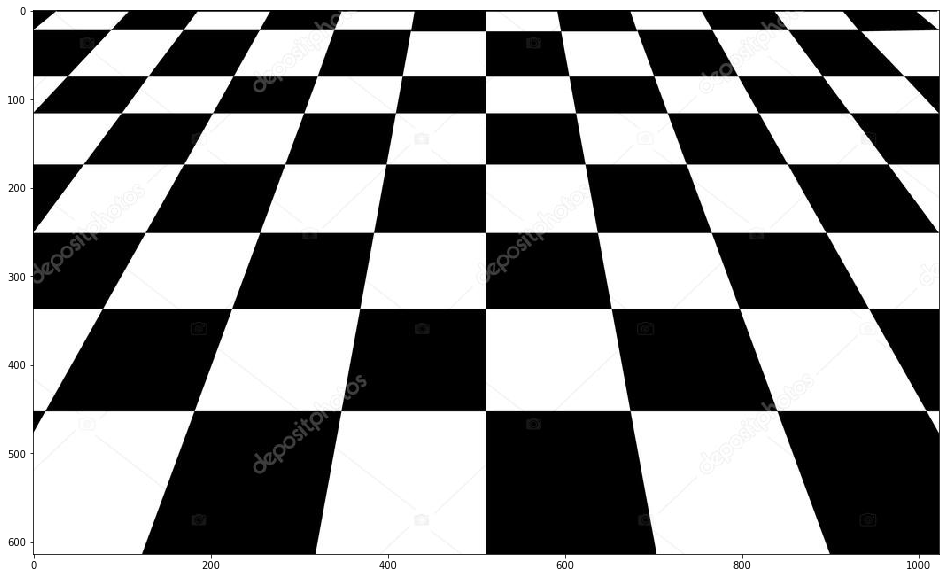

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

img = cv2.imread("images/tiles.jpg")
img_cp = np.copy(img)

img_cp = cv2.cvtColor(img_cp, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.imshow(img_cp);

## Corners

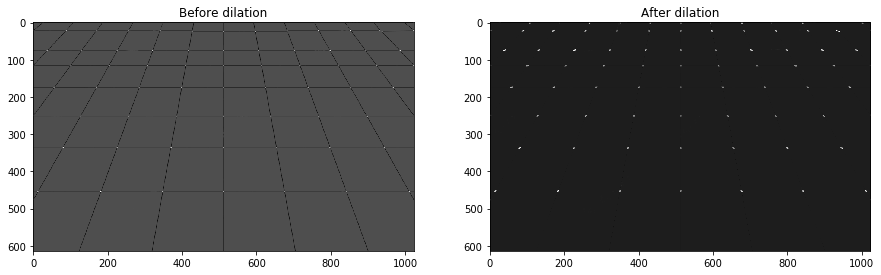

In [5]:
gray = cv2.cvtColor(img_cp, cv2.COLOR_RGB2GRAY)

gray = np.float32(gray)

# Detect corners
# cornerHarris(img, img shift size, kernel size, rating)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate for better results
dilate = cv2.dilate(dst, None)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

ax1.set_title("Before dilation")
ax1.imshow(dst, cmap="gray")

ax2.set_title("After dilation")
ax2.imshow(dilate, cmap="gray");

## Refine and display stronger corners

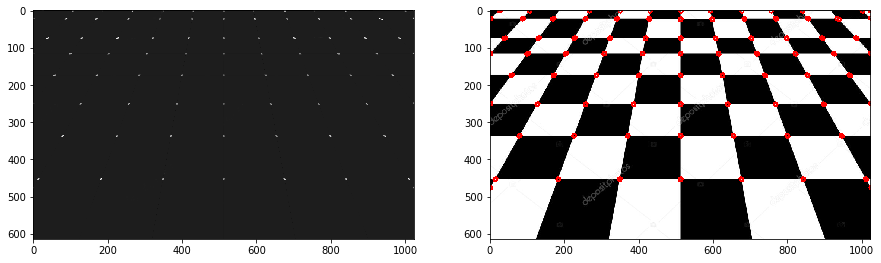

In [23]:
# Threshold the values for enhance corners

thresh = 0.1*dst.max() #max value from array

corner_img = np.copy(img_cp)

for j in range(dilate.shape[0]):
    for i in range(dilate.shape[1]):
        if(dilate[j, i] >= thresh):
            cv2.circle(corner_img, (i, j), 5, (255, 0, 0), 1)
            
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

ax1.imshow(dilate, cmap="gray")
ax2.imshow(corner_img);

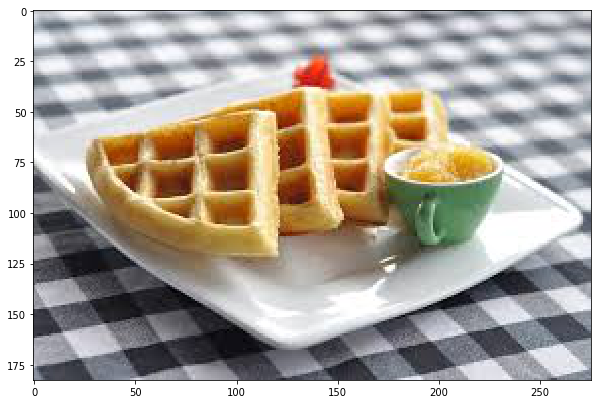

In [26]:
img = cv2.imread("images/waffle.jpg")

img_cp = np.copy(img)

img_cp = cv2.cvtColor(img_cp, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_cp);

## Corner detection

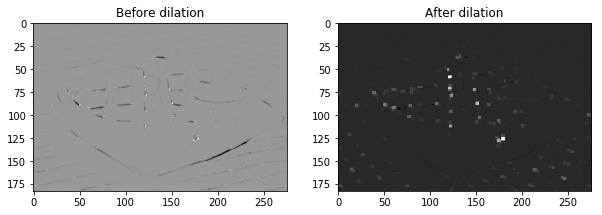

In [28]:
gray = cv2.cvtColor(img_cp, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dilate = cv2.dilate(dst, None)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ax1.set_title("Before dilation")
ax1.imshow(dst, cmap="gray")

ax2.set_title("After dilation")
ax2.imshow(dilate, cmap="gray");

## Find and display strong corners

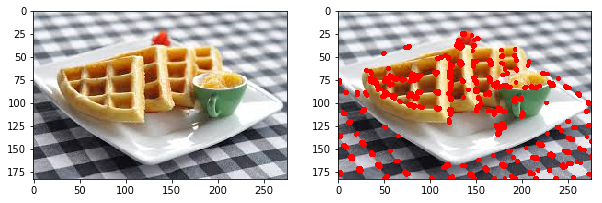

In [33]:
thresh = 0.01*dilate.max()

corner_image = np.copy(img_cp)

for i in range(dilate.shape[0]):
    for j in range(dilate.shape[1]):
        if(dilate[i, j] >= thresh):
            cv2.circle(corner_image, (j, i), 1, (255, 0, 0), 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.imshow(img_cp)
ax2.imshow(corner_image);